**LINEAR REGRESSION**

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
ad_df=os.path.join(os.path.dirname(os.getcwd()),'csv_data','advertising.csv')

In [22]:
ad_df=pd.read_csv('advertising.csv')

In [23]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Data Preparation**

In [24]:
data = ad_df[['TV']]
labels= ad_df['Sales']

In [25]:
print(data.shape)

(200, 1)


In [26]:
print(labels.shape)

(200,)


**DATA SPLITTING**

In [27]:
!pip install scikit-learn

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr.coef_

array([0.05548294])

In [34]:
lr.intercept_

7.007108428241848

In [35]:
prediction = lr.predict(x_test)

In [36]:
print(prediction)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


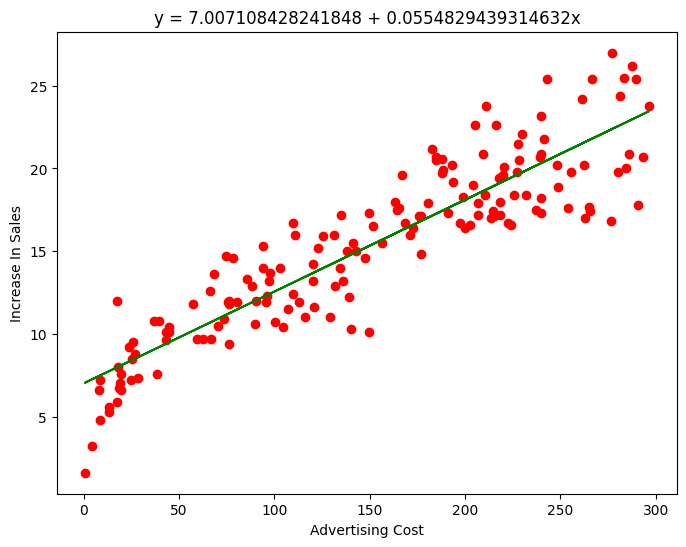

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x = x_train, y= y_train, color = 'red')
plt.plot(x_train,lr.predict(x_train), color='green')
plt.title("y = {} + {}x".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('Advertising Cost')
plt.ylabel("Increase In Sales")
plt.show()

**Cost/Loss Function For Linear Regression**

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [40]:
print("MSE is",mean_squared_error(y_test,prediction))
print("RMSE is",mean_squared_error(y_test,prediction,squared=False))
print("MSE is",mean_absolute_error(y_test,prediction))
print("Rsquare is",r2_score(y_test,prediction))

MSE is 6.101072906773963
RMSE is 2.470035001123256
MSE is 1.9502948931650088


NameError: name 'r2_score' is not defined

**MULTIPLE REGRESSION**

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                   random_state = 42)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr  = LinearRegression()

In [47]:
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
lr.coef_

array([0.05548294])

In [49]:
lr.intercept_

7.007108428241848

In [50]:
predictions = lr.predict(x_test)

In [51]:
predictions

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

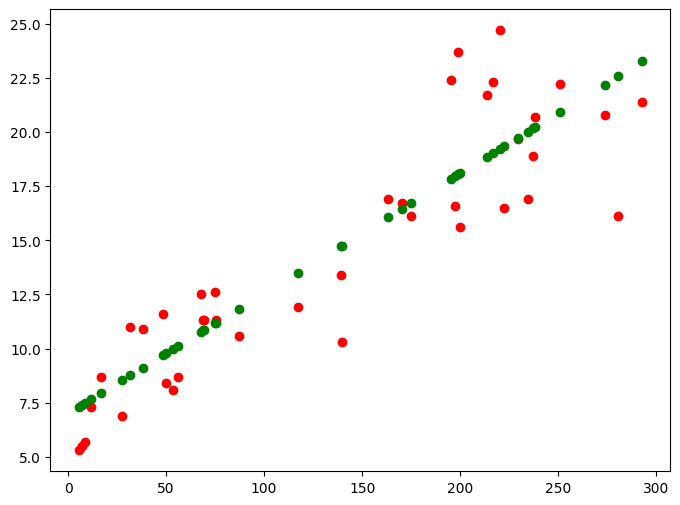

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_test['TV'], y_test, color='red')
plt.scatter(x_test['TV'], predictions, color='green')
plt.show()

**LASSO REGRESSION**

In [53]:
data = ad_df.drop('Sales', axis=1)
labels = ad_df['Sales']

In [54]:
print(data.shape)
print(labels.shape)

(200, 3)
(200,)


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                   random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [57]:
from sklearn.linear_model import Lasso

In [88]:
lasso_r=Lasso(alpha=4)

In [89]:
lasso_r.fit(x_train, y_train)

Lasso(alpha=4)

In [90]:
lasso_r.coef_

array([0.05411492, 0.08501478, 0.        ])

In [62]:
lasso_r.intercept_

5.267572966286885

In [63]:
predictions = lasso_r.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions, 
                                                               squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))

Mean squared error is 3.074966081178691
Mean Absolute error is 1.317888926759824
Root Mean squared error is 1.753558120273945
R2 score is 0.9004900770141292


**Ridge Regression**

In [68]:
from sklearn.linear_model import Ridge

In [75]:
ridge_r=Ridge(alpha=15)

In [76]:
ridge_r.fit(x_train, y_train)

Ridge(alpha=15)

In [78]:
ridge_r.coef_

array([0.05450896, 0.10089496, 0.00434992])

In [93]:
predictions=ridge_r.predict(x_test)

In [94]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions,                                                                squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))

Mean squared error is 2.908345046447881
Mean Absolute error is 1.2748853037990675
Root Mean squared error is 1.7053870664596589
R2 score is 0.9058821515593982
